In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#reading data from CSV file to a Pandas DataFrame
df = pd.read_csv("/content/Wine.csv")

#To Know total number of rows, columns (name, datatypes and null values)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

The data obtained from Wine.csv is a calssification of the Wines procured from 3 different fields of same region in Italy. The data represents the result of chemical analysis of the wine samples from 3 fields which are classified as Class 1, 2 and 3.

There are 14 columns including the Class column.

Total 178 rows with No Null values in any of the columns.

As these are checmical analysis results, zeros can be present as a valid data in any of the columns other than Class column.

In [2]:
df.describe()

Class     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color intensity         Hue  \
count       178.000000       178.000000  178.000000   
mean          1.590899         5.058090    0.957449   
std           0.572359         2.318286    0.228572   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.220000    0.782500   
50%           1.555000         4.690000    0.965000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       OD280/OD315 of diluted wines      Proline  
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

In [3]:
#A glance at first few records from the dataset
df.head()

Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [15]:
#Check for Duplicates
df[df.duplicated()].shape

(0, 14)

No Duplicates found.

In [6]:
df['Class'].unique()

array([1, 2, 3])

As you can see from the Description of the DataFrame and as well as the check above, the Target column Class is having only 3 values - 1,2, and 3.

In [10]:
df['Class'].value_counts().sort_values()

Class
3    48
1    59
2    71
Name: count, dtype: int64

Out of the total 178 records:

- 71 records belong to Class 2 Wine
- 59 records belong to Class 1 Wine
- 48 records belong to Class 3 Wine

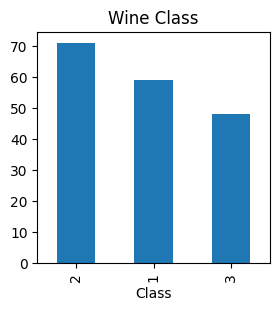

In [14]:
df['Class'].value_counts().plot(kind='bar',title='Wine Class',figsize=(3,3))
plt.show()

# Visualization

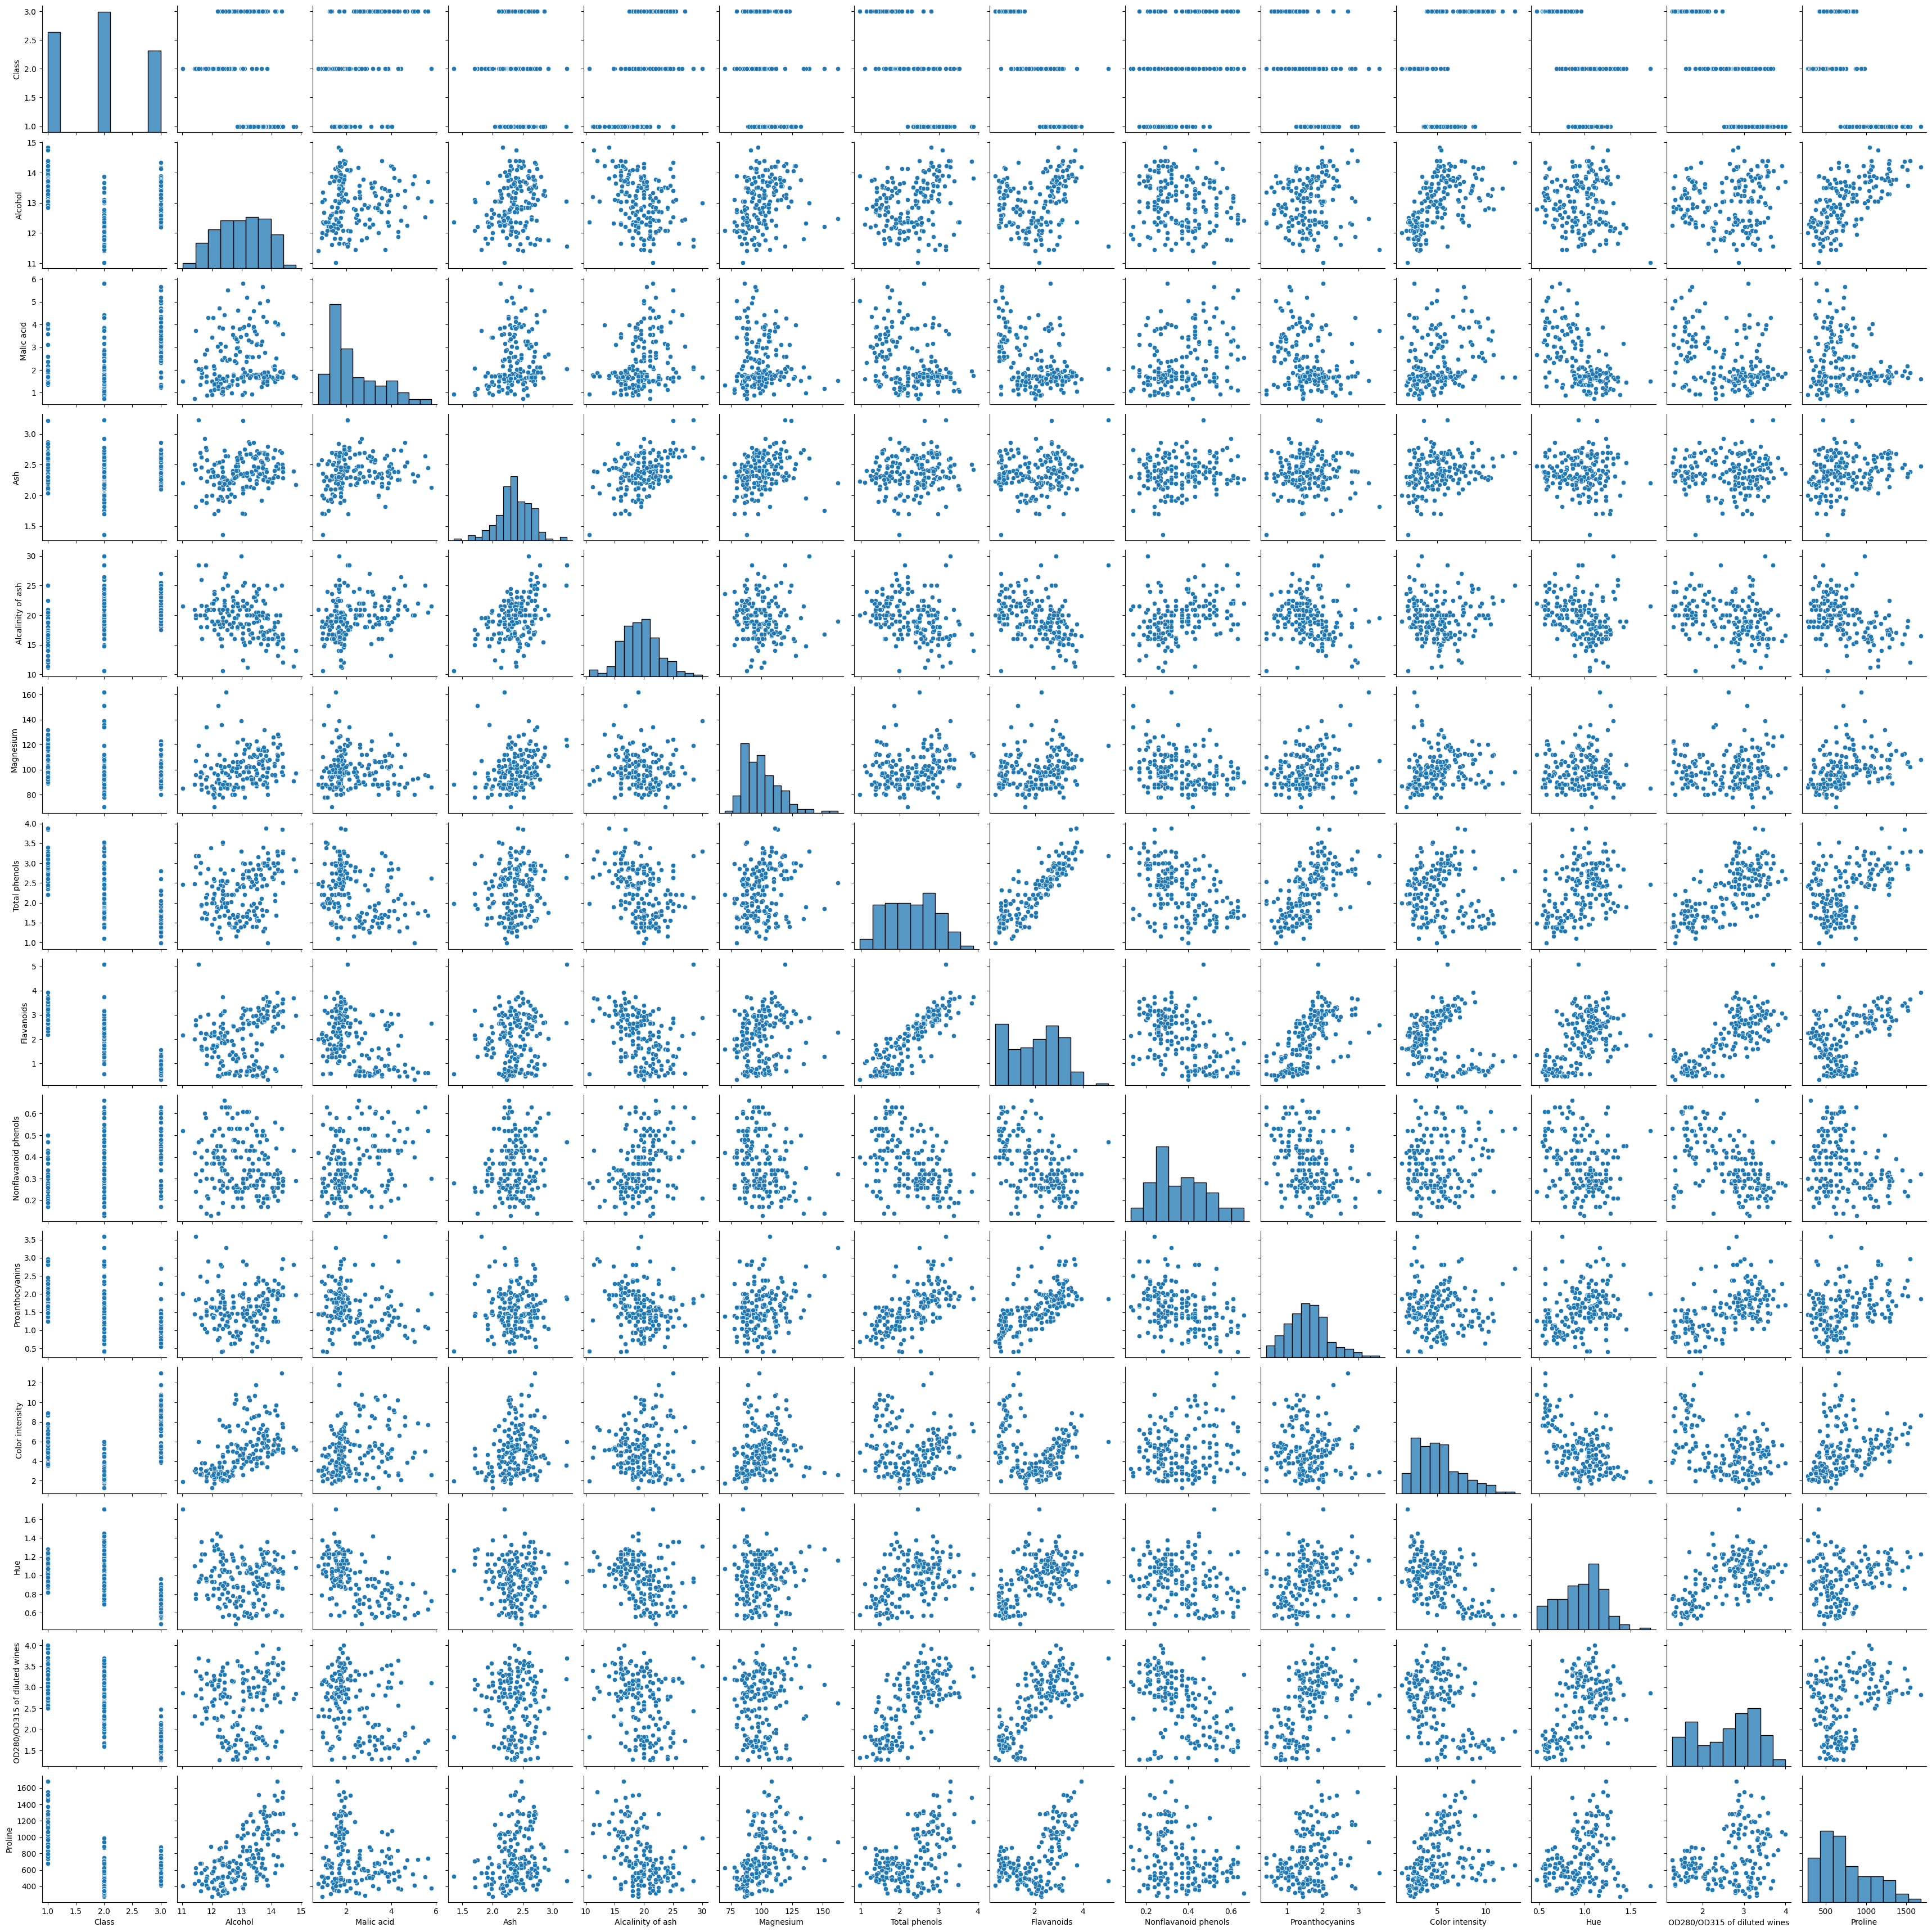

In [18]:
#A glance at the visualization on distribution and correlation using pair plot
sns.pairplot(df)
plt.show()

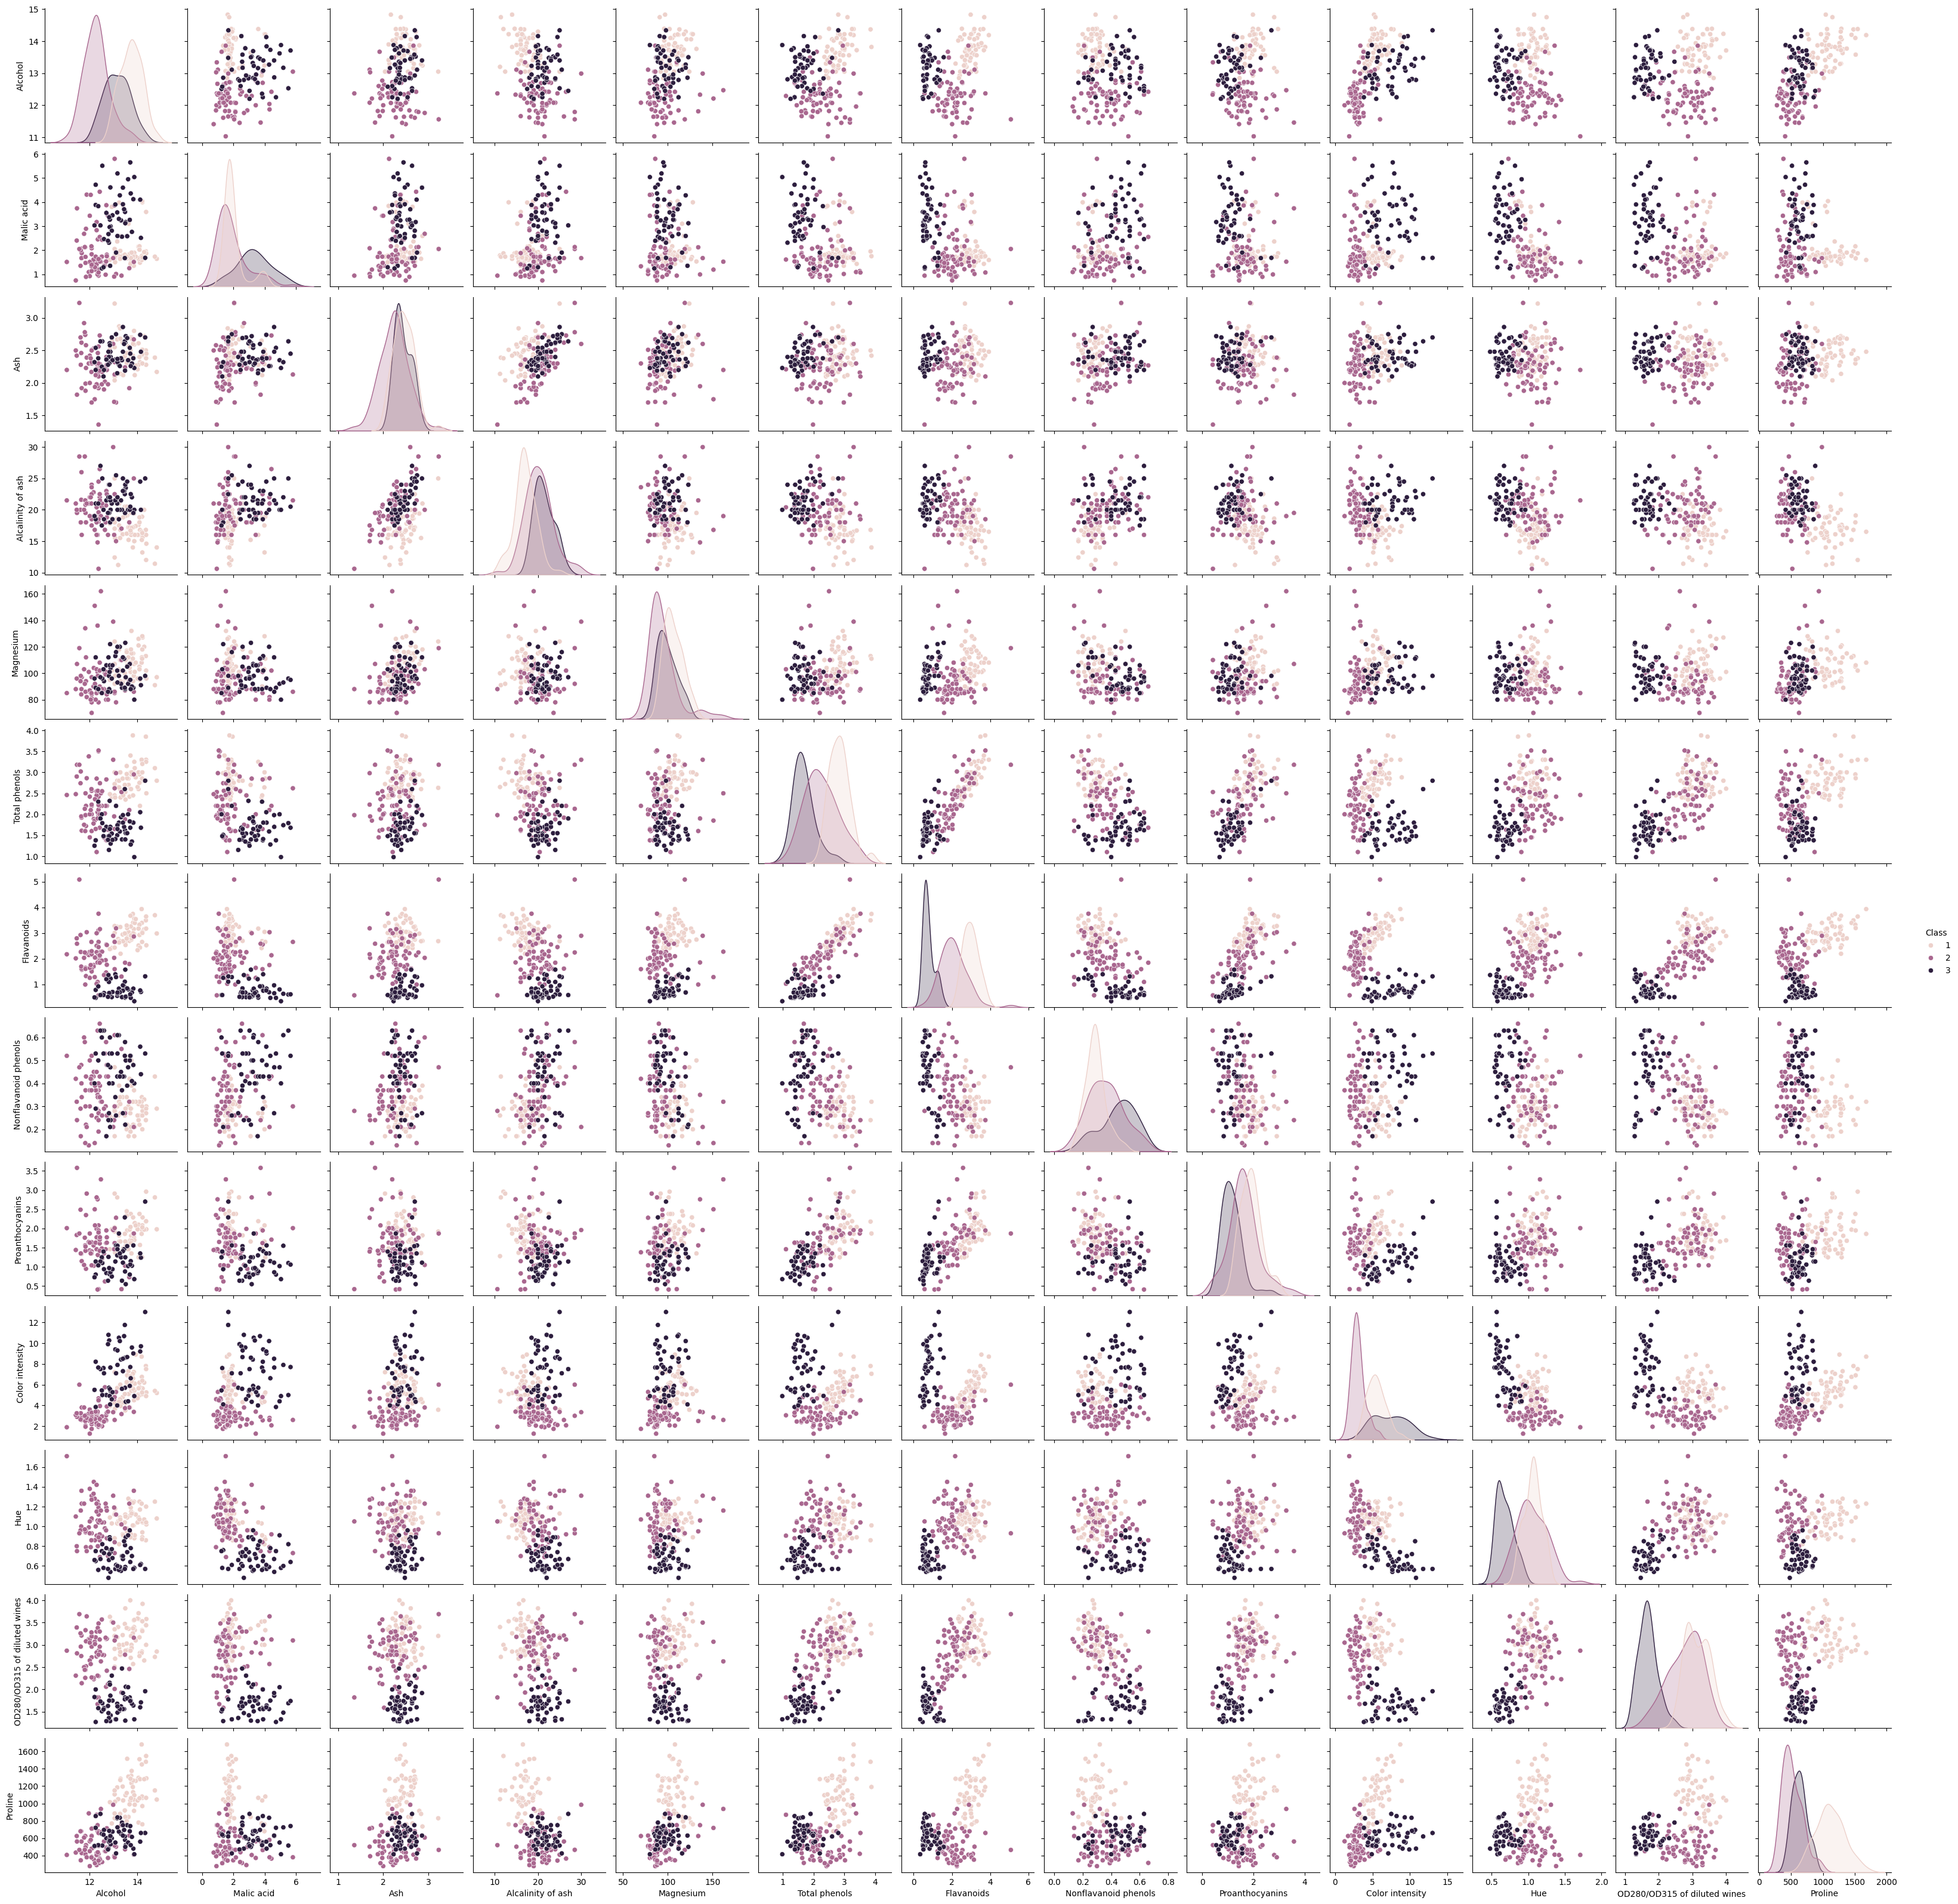

In [3]:
#A glance at the visualization on distribution and correlation using pair plot
sns.pairplot(df,hue='Class')
plt.show()

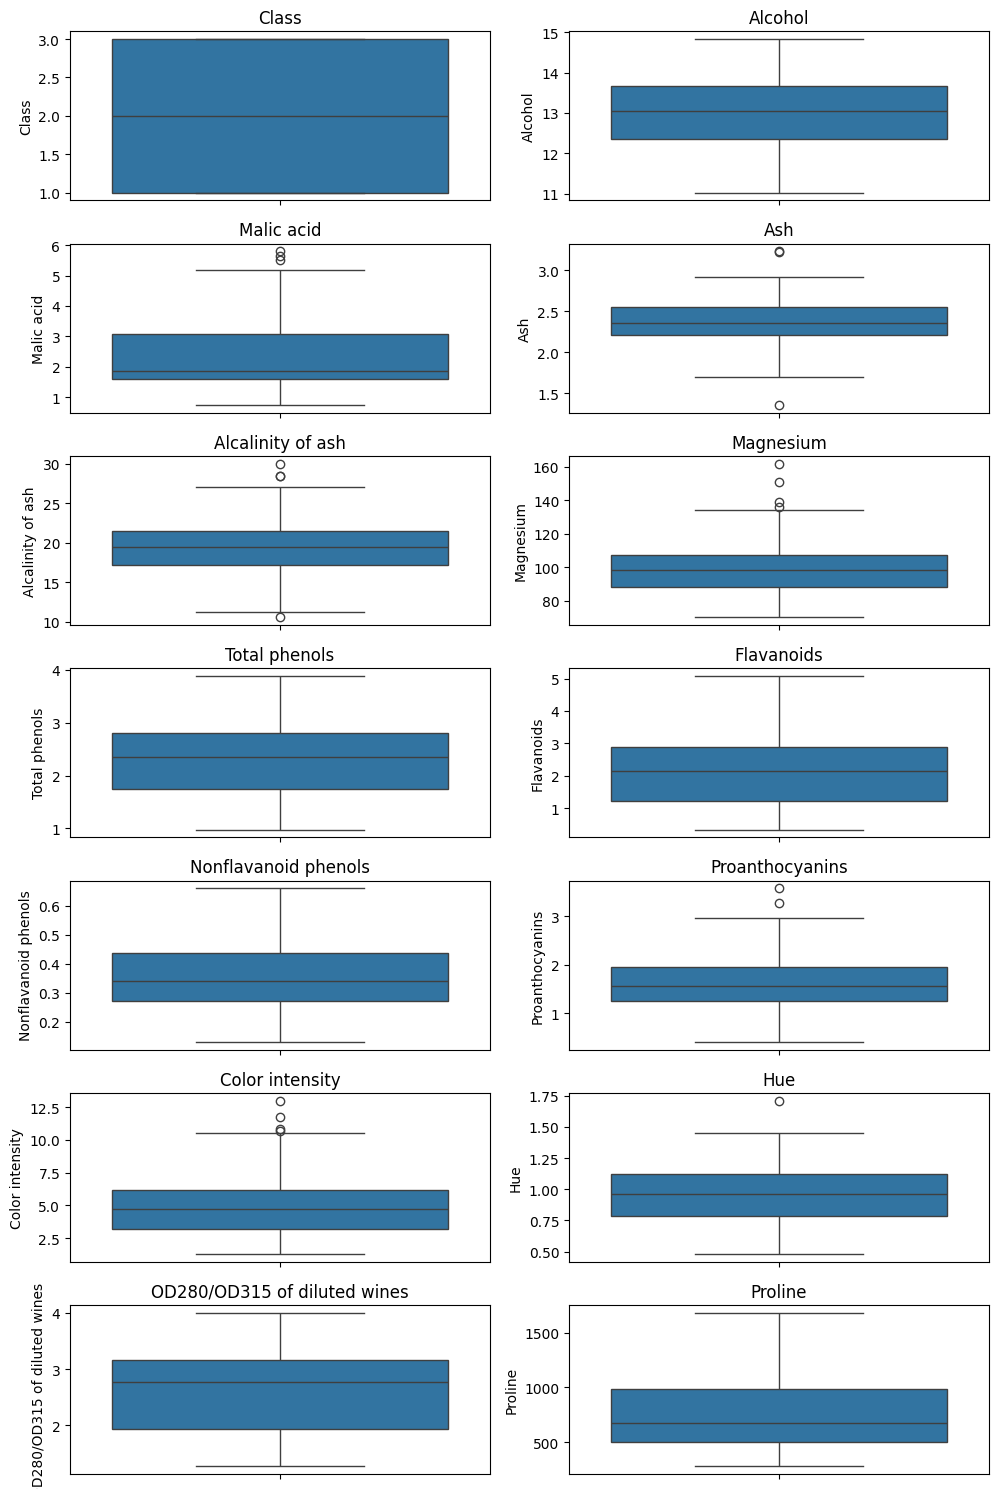

In [14]:
#Checking Outliers
plt.figure(figsize=(10, 15))
for i, column in enumerate(df, 1):
    plt.subplot(7, 2, i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()


# Cleaning

In [7]:
#Renaming column names for ease of use
df_renamed = df.copy()
df_renamed.rename({'Malic acid':'Malic_acid',
           'Alcalinity of ash':'Ash_Alcalinity',
           'Total phenols':'Total_phenols',
           'Nonflavanoid phenols':'Nonflavanoid_phenols',
           'Color intensity':'Color_intensity',
           'OD280/OD315 of diluted wines':'OD280/OD315'
           },axis=1,inplace=True)
df_renamed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Ash_Alcalinity        178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280/OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [27]:
#Handling Outliers
Outlier_Columns=['Malic_acid','Ash', 'Ash_Alcalinity', 'Magnesium', 'Proanthocyanins', 'Color_intensity','Hue']

#Working with the copy of renamed version of data without affecting the renamed dataframe
df1= df_renamed.copy()

for c in Outlier_Columns:
  Q1 = df1[c].quantile(0.25)
  Q3 = df1[c].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  # Filter outliers using the interquartile range (IQR) method
  df1 = df1[(df1[c] >= lower_bound) & (df1[c] <= upper_bound)]
  print('\nTotal Records after removal of outlier from ',c,' is ',df1.shape)
  print('\n std Proline: ',df1['Proline'].std())



Total Records after removal of outlier from  Malic_acid  is  (175, 14)

 std Proline:  315.8820894731417

Total Records after removal of outlier from  Ash  is  (172, 14)

 std Proline:  317.33577417941933

Total Records after removal of outlier from  Ash_Alcalinity  is  (170, 14)

 std Proline:  317.94311552987546

Total Records after removal of outlier from  Magnesium  is  (167, 14)

 std Proline:  320.47298952880755

Total Records after removal of outlier from  Proanthocyanins  is  (165, 14)

 std Proline:  316.02294197127577

Total Records after removal of outlier from  Color_intensity  is  (162, 14)

 std Proline:  317.9973564154539

Total Records after removal of outlier from  Hue  is  (161, 14)

 std Proline:  317.8162969428794


Its noticed that dropping the outliers is having an impact on the Proline column which is not having any outliers.

Hence below we are checking similar impact on other columns as well.

In [28]:
for c in df_renamed.columns:
  print('\n',c,' : ',df_renamed[c].std(),' : ',df1[c].std())



 Class  :  0.7750349899850564  :  0.7857425178439984

 Alcohol  :  0.8118265380058575  :  0.7914219748250771

 Malic_acid  :  1.1171460976144627  :  1.0534057196771087

 Ash  :  0.27434400906081485  :  0.24192207179146713

 Ash_Alcalinity  :  3.339563767173505  :  2.974148972698113

 Magnesium  :  14.282483515295665  :  12.401346726106725

 Total_phenols  :  0.6258510488339893  :  0.6289637785934964

 Flavanoids  :  0.9988586850169467  :  0.9814206768919513

 Nonflavanoid_phenols  :  0.12445334029667937  :  0.12182059025952931

 Proanthocyanins  :  0.5723588626747613  :  0.5138382013873326

 Color_intensity  :  2.318285871822413  :  2.1552068129451576

 Hue  :  0.22857156582982338  :  0.21737640523477939

 OD280/OD315  :  0.7099904287650504  :  0.7134090583052963

 Proline  :  314.9074742768491  :  317.8162969428794


In [29]:
#trying out mean imputation to outlier values
Outlier_Columns=['Malic_acid','Ash', 'Ash_Alcalinity', 'Magnesium', 'Proanthocyanins', 'Color_intensity','Hue']

#Working with the copy of renamed version of data without affecting the renamed dataframe
df2 = df_renamed.copy()

for c in Outlier_Columns:
  Q1 = df2[c].quantile(0.25)
  Q3 = df2[c].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  mean = df2[c].mean()
  df2[c] = df2[c].apply(lambda x: mean if (x < lower_bound or x > upper_bound) else x)
  print('Mean Imputation on Outliers of ',c,' std Proline: ',df2['Proline'].std())





Mean Imputation on Outliers of  Malic_acid  std Proline:  314.9074742768491
Mean Imputation on Outliers of  Ash  std Proline:  314.9074742768491
Mean Imputation on Outliers of  Ash_Alcalinity  std Proline:  314.9074742768491
Mean Imputation on Outliers of  Magnesium  std Proline:  314.9074742768491
Mean Imputation on Outliers of  Proanthocyanins  std Proline:  314.9074742768491
Mean Imputation on Outliers of  Color_intensity  std Proline:  314.9074742768491
Mean Imputation on Outliers of  Hue  std Proline:  314.9074742768491


Decided to not drop the outliers but impute them with Mean and check the impact on the Proline column.

While Mean imputing also, we have two scenarios. Calculating mean with outliers and without outliers.

Removing the outliers and calculating the mean might bring in bias. Still we can check the impact.

In [30]:
#trying out mean imputation to outlier values (computed mean withoout outliers)
Outlier_Columns=['Malic_acid','Ash', 'Ash_Alcalinity', 'Magnesium', 'Proanthocyanins', 'Color_intensity','Hue']

#Working with the copy of renamed version of data without affecting the renamed dataframe
df3 = df_renamed.copy()

for c in Outlier_Columns:
  Q1 = df3[c].quantile(0.25)
  Q3 = df3[c].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  mean_non_outliers = df3[(df3[c] >= lower_bound) & (df3[c] <= upper_bound)][c].mean()
  df3[c] = df3[c].apply(lambda x: mean_non_outliers if (x < lower_bound or x > upper_bound) else x)
  print('Mean Imputation on Outliers of ',c,' std Proline: ',df3['Proline'].std())


Mean Imputation on Outliers of  Malic_acid  std Proline:  314.9074742768491
Mean Imputation on Outliers of  Ash  std Proline:  314.9074742768491
Mean Imputation on Outliers of  Ash_Alcalinity  std Proline:  314.9074742768491
Mean Imputation on Outliers of  Magnesium  std Proline:  314.9074742768491
Mean Imputation on Outliers of  Proanthocyanins  std Proline:  314.9074742768491
Mean Imputation on Outliers of  Color_intensity  std Proline:  314.9074742768491
Mean Imputation on Outliers of  Hue  std Proline:  314.9074742768491


In [31]:
#Checking the acrtoss original DF, Outliers Dropped DF, Mean imputed with outliers, Mean imputed without outliers
for c in df_renamed.columns:
  print('\n',c,' : ',df_renamed[c].std(),' : ',df1[c].std(),' : ',df2[c].std(),' : ',df3[c].std())



 Class  :  0.7750349899850564  :  0.7857425178439984  :  0.7750349899850564  :  0.7750349899850564

 Alcohol  :  0.8118265380058575  :  0.7914219748250771  :  0.8118265380058575  :  0.8118265380058575

 Malic_acid  :  1.1171460976144627  :  1.0534057196771087  :  1.0286659406684848  :  1.028639751564555

 Ash  :  0.27434400906081485  :  0.24192207179146713  :  0.2473805371566397  :  0.24737998206939088

 Ash_Alcalinity  :  3.339563767173505  :  2.974148972698113  :  3.0255078356027263  :  3.025461416100098

 Magnesium  :  14.282483515295665  :  12.401346726106725  :  12.246508857699242  :  12.245444291775645

 Total_phenols  :  0.6258510488339893  :  0.6289637785934964  :  0.6258510488339893  :  0.6258510488339893

 Flavanoids  :  0.9988586850169467  :  0.9814206768919513  :  0.9988586850169467  :  0.9988586850169467

 Nonflavanoid_phenols  :  0.12445334029667937  :  0.12182059025952931  :  0.12445334029667937  :  0.12445334029667937

 Proanthocyanins  :  0.5723588626747613  :  0.5138

With the above analysis, decided to not delete the outliers, but impute them with the mean value calculated with the outliers in place (inorder to avoid inducing bias)

In [32]:
#Going ahead with renamed and mean imputed version (mean calculated with outliers in place)
df_cleaned = df2.copy()

In [15]:
df_cleaned.describe()

Class     Alcohol  Malic_acid         Ash  Ash_Alcalinity  \
count  161.000000  161.000000  161.000000  161.000000      161.000000   
mean     1.913043   13.034596    2.318199    2.364658       19.300621   
std      0.785743    0.791422    1.053406    0.241922        2.974149   
min      1.000000   11.410000    0.740000    1.700000       11.200000   
25%      1.000000   12.370000    1.610000    2.230000       17.200000   
50%      2.000000   13.070000    1.860000    2.360000       19.000000   
75%      3.000000   13.690000    3.100000    2.540000       21.000000   
max      3.000000   14.830000    5.190000    2.920000       27.000000   

        Magnesium  Total_phenols  Flavanoids  Nonflavanoid_phenols  \
count  161.000000     161.000000  161.000000            161.000000   
mean    98.590062       2.280435    2.026894              0.359006   
std     12.401347       0.628964    0.981421              0.121821   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.700000    1.200000              0.270000   
50%     98.000000       2.320000    2.130000              0.340000   
75%    106.000000       2.800000    2.900000              0.430000   
max    134.000000       3.880000    3.930000              0.660000   

       Proanthocyanins  Color_intensity         Hue  OD280/OD315      Proline  
count       161.000000       161.000000  161.000000   161.000000   161.000000  
mean          1.538758         5.033913    0.956932     2.619876   753.819876  
std           0.513838         2.155207    0.217376     0.713409   317.816297  
min           0.410000         1.280000    0.540000     1.270000   278.000000  
25%           1.240000         3.270000    0.790000     2.000000   502.000000  
50%           1.480000         4.800000    0.960000     2.780000   675.000000  
75%           1.870000         6.200000    1.120000     3.180000  1020.000000  
max           2.910000        10.680000    1.450000     4.000000  1680.000000

# Correlation

In [33]:
corr_matrix = df_cleaned.corr()
corr_matrix

Class   Alcohol  Malic_acid       Ash  \
Class                 1.000000 -0.328222    0.425101 -0.031198   
Alcohol              -0.328222  1.000000    0.095561  0.250555   
Malic_acid            0.425101  0.095561    1.000000  0.169181   
Ash                  -0.031198  0.250555    0.169181  1.000000   
Ash_Alcalinity        0.568693 -0.300168    0.291693  0.333776   
Magnesium            -0.250909  0.371675    0.042627  0.366929   
Total_phenols        -0.719163  0.289101   -0.341916  0.093151   
Flavanoids           -0.847498  0.236815   -0.407380  0.021109   
Nonflavanoid_phenols  0.489109 -0.155929    0.266950  0.157336   
Proanthocyanins      -0.534780  0.196917   -0.252853 -0.003336   
Color_intensity       0.198163  0.554875    0.295844  0.217374   
Hue                  -0.638837 -0.027454   -0.558425 -0.076001   
OD280/OD315          -0.788230  0.072343   -0.368537 -0.067397   
Proline              -0.633717  0.643720   -0.173128  0.243947   

                      Ash_Alcalinity  Magnesium  Total_phenols  Flavanoids  \
Class                       0.568693  -0.250909      -0.719163   -0.847498   
Alcohol                    -0.300168   0.371675       0.289101    0.236815   
Malic_acid                  0.291693   0.042627      -0.341916   -0.407380   
Ash                         0.333776   0.366929       0.093151    0.021109   
Ash_Alcalinity              1.000000  -0.153357      -0.413645   -0.483920   
Magnesium                  -0.153357   1.000000       0.238941    0.226544   
Total_phenols              -0.413645   0.238941       1.000000    0.864564   
Flavanoids                 -0.483920   0.226544       0.864564    1.000000   
Nonflavanoid_phenols        0.368414  -0.223397      -0.449935   -0.537900   
Proanthocyanins            -0.294260   0.098850       0.616985    0.679466   
Color_intensity            -0.066721   0.328414      -0.052560   -0.131481   
Hue                        -0.348742  -0.009162       0.442627    0.558324   
OD280/OD315                -0.370036   0.045419       0.699949    0.787194   
Proline                    -0.483080   0.429717       0.498115    0.494193   

                      Nonflavanoid_phenols  Proanthocyanins  Color_intensity  \
Class                             0.489109        -0.534780         0.198163   
Alcohol                          -0.155929         0.196917         0.554875   
Malic_acid                        0.266950        -0.252853         0.295844   
Ash                               0.157336        -0.003336         0.217374   
Ash_Alcalinity                    0.368414        -0.294260        -0.066721   
Magnesium                        -0.223397         0.098850         0.328414   
Total_phenols                    -0.449935         0.616985        -0.052560   
Flavanoids                       -0.537900         0.679466        -0.131481   
Nonflavanoid_phenols              1.000000        -0.363264         0.108995   
Proanthocyanins                  -0.363264         1.000000        -0.044589   
Color_intensity                   0.108995        -0.044589         1.000000   
Hue                              -0.295521         0.312627        -0.459201   
OD280/OD315                      -0.503270         0.546634        -0.386813   
Proline                          -0.311385         0.353533         0.379035   

                           Hue  OD280/OD315   Proline  
Class                -0.638837    -0.788230 -0.633717  
Alcohol              -0.027454     0.072343  0.643720  
Malic_acid           -0.558425    -0.368537 -0.173128  
Ash                  -0.076001    -0.067397  0.243947  
Ash_Alcalinity       -0.348742    -0.370036 -0.483080  
Magnesium            -0.009162     0.045419  0.429717  
Total_phenols         0.442627     0.699949  0.498115  
Flavanoids            0.558324     0.787194  0.494193  
Nonflavanoid_phenols -0.295521    -0.503270 -0.311385  
Proanthocyanins       0.312627     0.546634  0.353533  
Color_intensity      -0.459201    -0.386813  0

In [50]:
# Reshape the correlation matrix to a long format and reset the index
corr_pairs = corr_matrix.unstack().reset_index()

# Rename the columns for clarity
corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Remove self correlations
corr_pairs = corr_pairs[corr_pairs['Feature1'] != corr_pairs['Feature2']]

# Sort the correlation pairs by absolute value of correlation
corr_pairs = corr_pairs.sort_values(by='Correlation', key=abs, ascending=False)

# Extract the top 10 correlation pairs
top_pairs = corr_pairs.drop_duplicates(subset=['Correlation']).head(25)

# Display the top 10 correlation pairs
print("Top 10 Correlation Pairs:")
print(top_pairs)


Top 10 Correlation Pairs:
                 Feature1              Feature2  Correlation
91          Total_phenols            Flavanoids     0.864564
98             Flavanoids                 Class    -0.847498
12                  Class           OD280/OD315    -0.788230
110            Flavanoids           OD280/OD315     0.787194
84          Total_phenols                 Class    -0.719163
174           OD280/OD315         Total_phenols     0.699949
107            Flavanoids       Proanthocyanins     0.679466
183               Proline               Alcohol     0.643720
154                   Hue                 Class    -0.638837
13                  Class               Proline    -0.633717
132       Proanthocyanins         Total_phenols     0.616985
179           OD280/OD315                   Hue     0.576743
56         Ash_Alcalinity                 Class     0.568693
156                   Hue            Malic_acid    -0.558425
161                   Hue            Flavanoids     0.55832

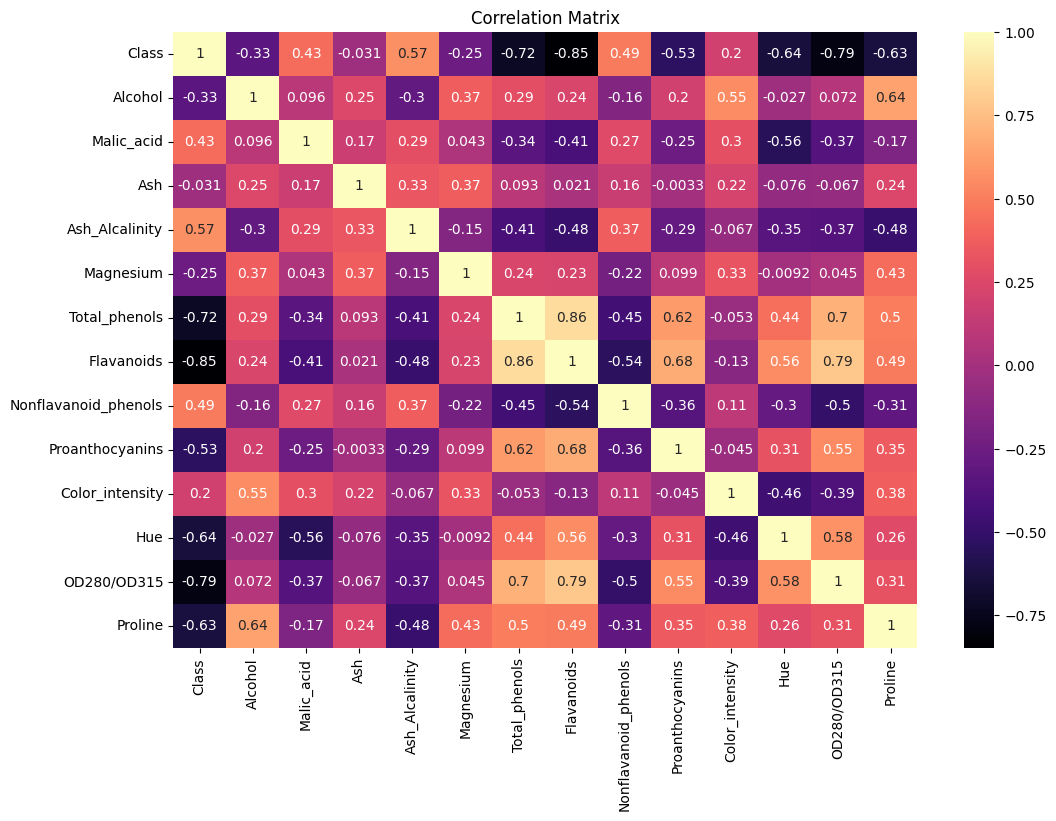

In [51]:
# Heatmap - Vizualizing the Correlation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='magma')
plt.title('Correlation Matrix')
plt.show()

**Inferences from the correlation matrix**

Below features has negative correlation with the Class of the Wine
- Flavanoids (-0.847498)
- OD280/OD315 (-0.788230)
- Total_phenols (-0.719163)
- Hue (-0.638837)
- Proline (-0.633717)
- Proanthocyanins (-0.534780)

**Below features and positively correlated with the Class of Wine**
- Ash_Alcalinity (0.568693)
- Nonflavanoid_phenols (0.489109)

**Below are the features which are strongly/moderately correlated to eachother**
- Total_phenols and Flavanoids : 0.864564
- Flavanoids and OD280/OD315 : 0.787194
- OD280/OD315 and Total_phenols : 0.699949
- Flavanoids and Proanthocyanins : 0.679466
- Proline and Alcohol : 0.643720
- Proanthocyanins and Total_phenols : 0.616985
- OD280/OD315 and Hue : 0.576743
- Hue and Malic_acid : -0.558425
- Hue and Flavanoids : 0.558324
- Color_intensity and Alcohol : 0.554875
- OD280/OD315 and Proanthocyanins : 0.546634
- Flavanoids and Nonflavanoid_phenols : -0.537900
- Nonflavanoid_phenols and OD280/OD315 : -0.503270
- Total_phenols and Proline: 0.498115
- Flavanoids and Proline: 0.494193
- Flavanoids and Ash_Alcalinity: -0.483920
- Proline and Ash_Alcalinity: -0.483080

**The two features which are weak in correlation are**
- Ash
- Magnesium



# Summary

The columns Ash and Magnesium can be dropped and the remaining 11 columns can be used to pass to the ML model with Class as the Target column.
